# Explore here

In [1]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

total_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [2]:
X = total_data[["MedInc", "Latitude", "Longitude"]]
X.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


In [6]:
X.shape

(20640, 3)

In [9]:
X.isnull().sum()

MedInc       0
Latitude     0
Longitude    0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size = 0.2)

X_train.head()

,MedInc,Latitude,Longitude
14143,2.1757,32.74,-117.09
20209,5.7601,34.28,-119.21
371,3.1458,37.74,-122.15
10809,2.6221,33.64,-117.94
10050,3.6607,39.18,-120.99


In [31]:
from sklearn.cluster import KMeans

model_unsupervised = KMeans(n_clusters = 6)
model_unsupervised.fit(X_train)

KMeans(n_clusters=6)

In [32]:
y_train = list(model_unsupervised.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14143,2.1757,32.74,-117.09,2
20209,5.7601,34.28,-119.21,0
371,3.1458,37.74,-122.15,3
10809,2.6221,33.64,-117.94,5
10050,3.6607,39.18,-120.99,3


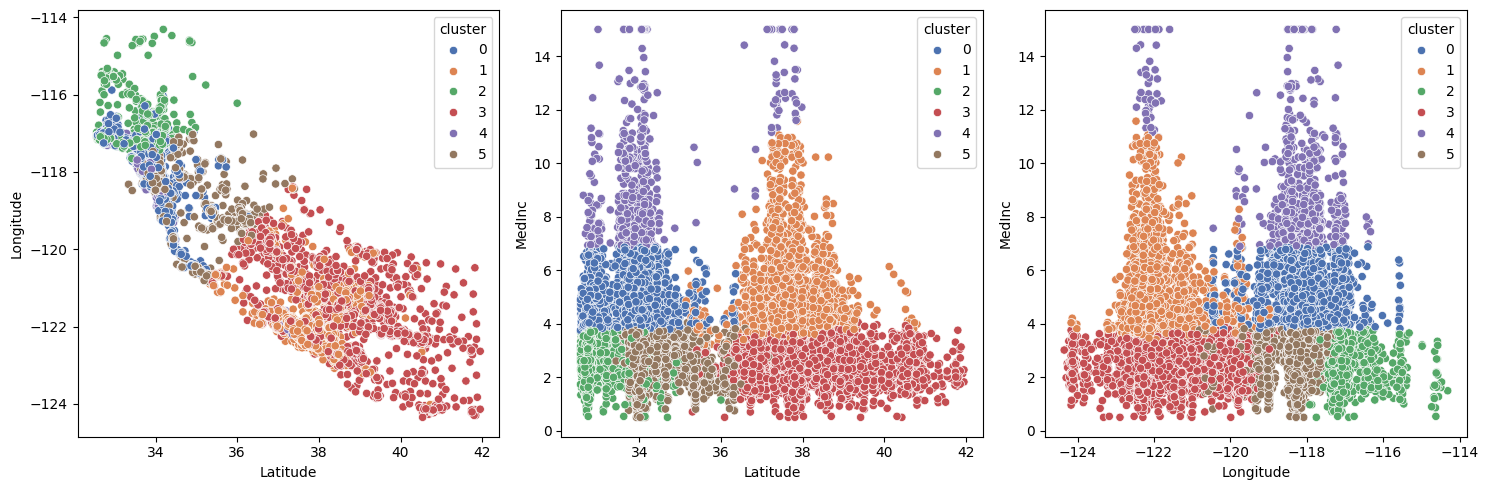

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

In [34]:
y_test = list(model_unsupervised.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
12114,3.5851,33.94,-117.23,2
20455,2.7137,34.27,-118.77,5
11189,4.3583,33.82,-117.92,0
20406,7.0010,34.20,-118.87,4
8698,4.5833,33.87,-118.35,0


In [25]:
from sklearn.tree import DecisionTreeClassifier

model_supervised = DecisionTreeClassifier(random_state = 42)
model_supervised.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

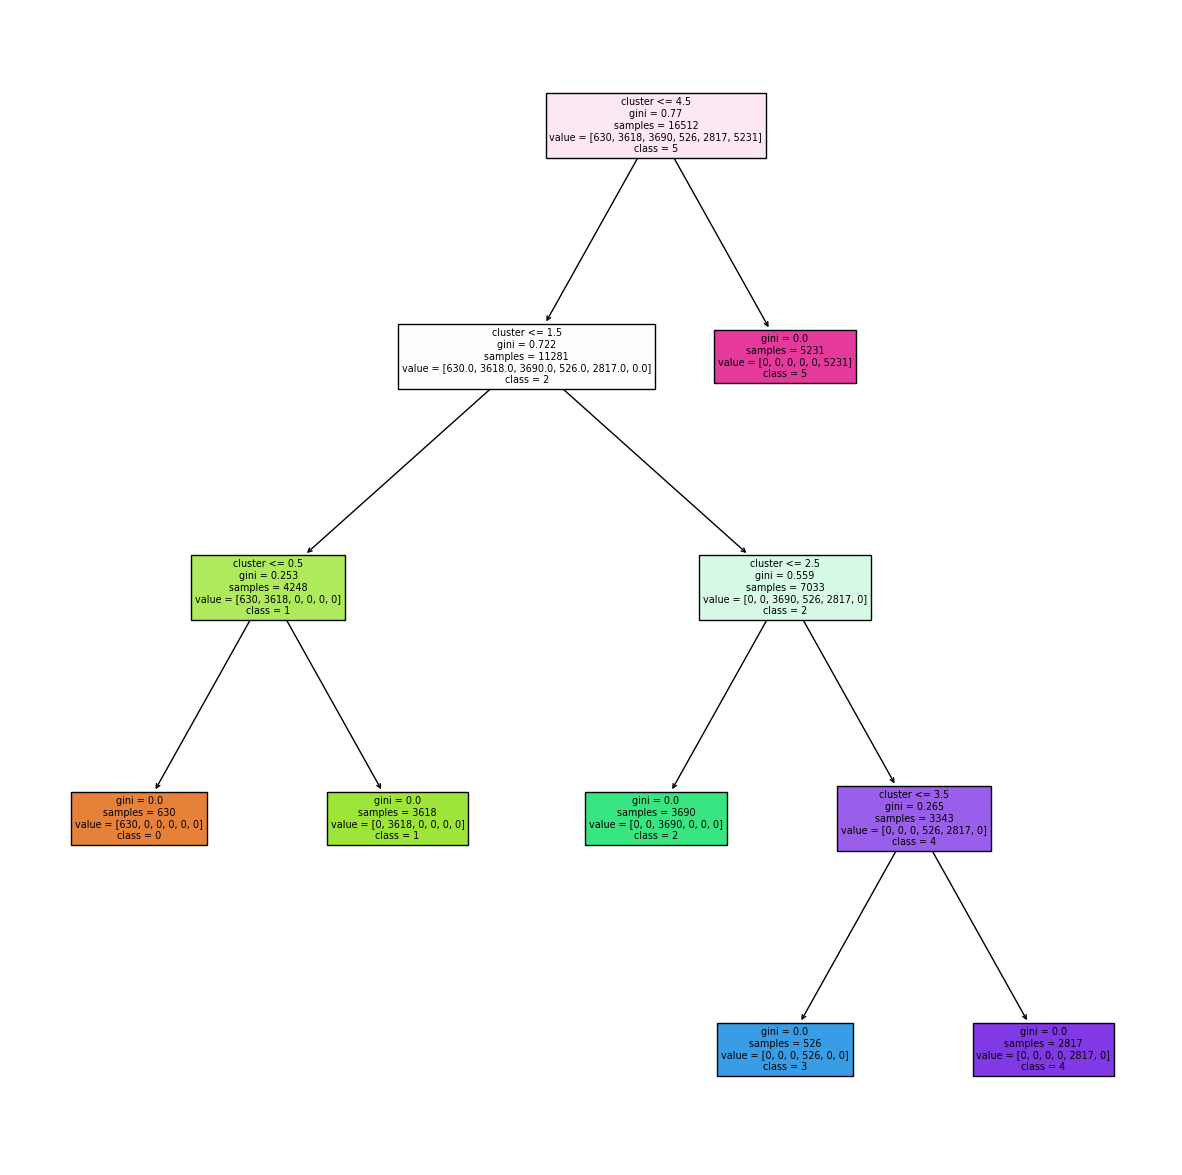

In [26]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_supervised, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

In [27]:
y_pred = model_supervised.predict(X_test)
y_pred

array([5, 5, 2, ..., 4, 4, 2], dtype=int32)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

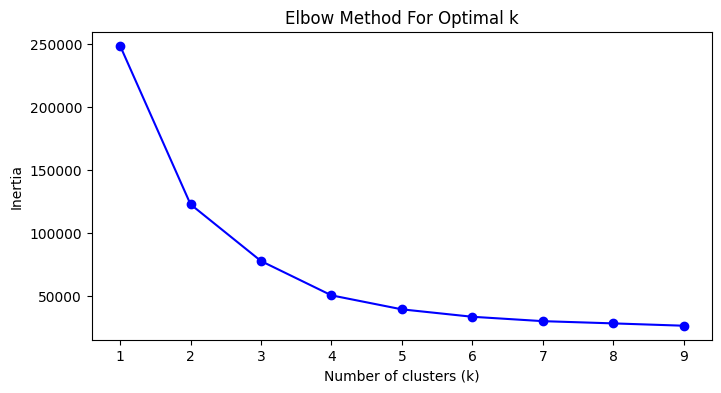

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Range of "k" to try
k_range = range(1, 10)

inertias = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [30]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search over
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'min_samples_split': [2, 5, 10]  # Minimum number of samples required to split an internal node
}

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=model_supervised, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score achieved
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score: 1.0
